#### ------------------------------------- WINE QUALITY PREDICTION USING MACHINE LEARNING -------------------------------------------

<img src="wine.png" alt="" width=900 height=600>

### Importing the required Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#### Importing the Data Set

In [3]:
wine_data = pd.read_csv('winequality-red.csv')

In [4]:
## number of rows and columns
wine_data.shape

(1599, 12)

In [5]:
## Displaying the first 5 rows
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
## Checking for null values or missing
wine_data.isnull().sum()/ len(wine_data)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

## Data Analysis and Visualization

In [7]:
## Statistical measures
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


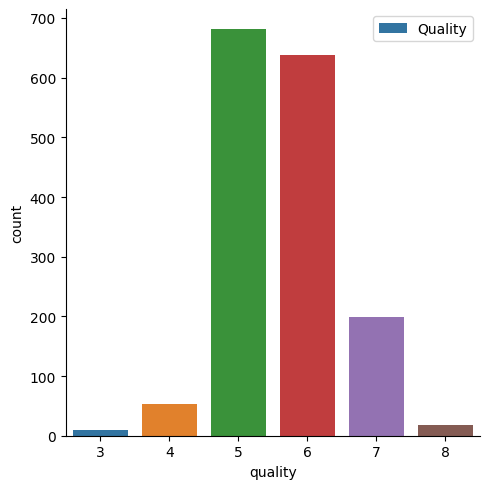

In [8]:
### number of values for each quailty

sns.catplot( x='quality', data=wine_data, kind='count', label='Quality')
plt.legend()
plt.show()

<Figure size 1500x1500 with 0 Axes>

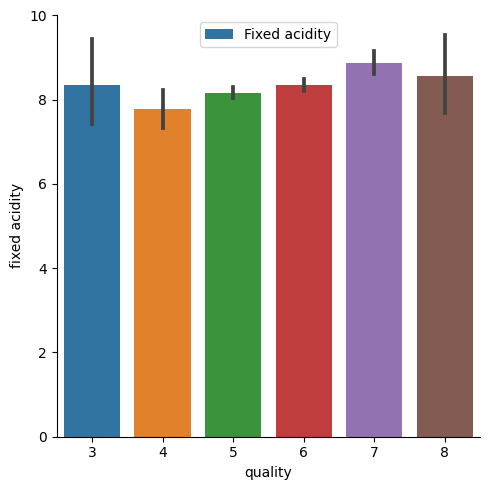

In [9]:
### Quality vs Fixed Acidity
plt.figure(figsize=(15,15))

sns.catplot(x='quality', y='fixed acidity', data=wine_data , kind='bar' ,label='Fixed acidity')
plt.legend()
plt.show()

<Figure size 1500x1500 with 0 Axes>

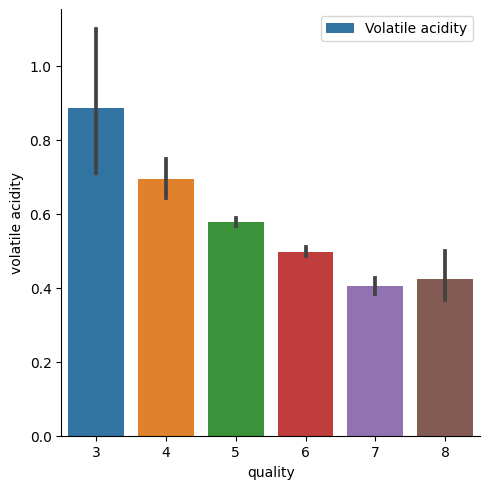

In [10]:
### Quality vs Volatile Acidity
plt.figure(figsize=(15,15))

sns.catplot(x='quality', y='volatile acidity', data=wine_data , kind='bar' ,label='Volatile acidity')
plt.legend()
plt.show()

<Figure size 1500x1500 with 0 Axes>

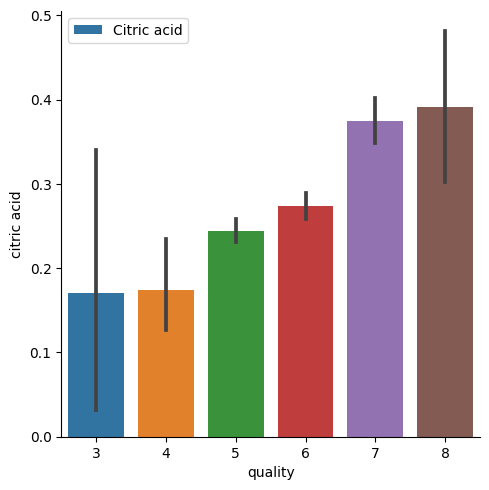

In [11]:
### Quality vs Citirc Acid
plt.figure(figsize=(15,15))

sns.catplot(x='quality', y='citric acid', data=wine_data , kind='bar' ,label='Citric acid')
plt.legend()
plt.show()

### Correlation

In [12]:
corr = wine_data.corr()

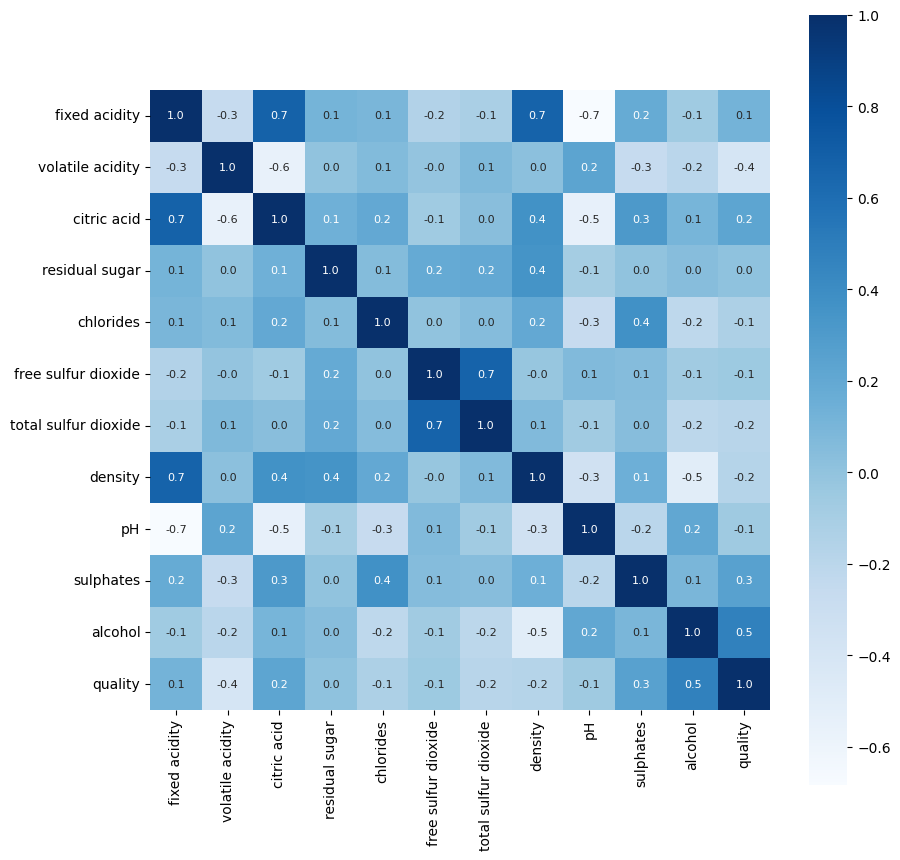

In [13]:
## heat-map
plt.figure(figsize=(10,10))
sns.heatmap( corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

#### Data Preprocessing

In [14]:
## axis =1 for column, axis =0 forrow
X = wine_data.drop('quality', axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


#### Label Binarization

In [15]:

Y = wine_data['quality'].apply(lambda y_val: 1 if y_val >=7 else 0 )
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

##### Train/ Test Split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [17]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


#### Model Traning and Evaluation

##### Random Foreset Classifier

In [18]:
model_rf = RFC()

In [19]:
## fitting the model
model_rf.fit(X_train, Y_train)

RandomForestClassifier()

In [20]:
## Prediciting
predict_rf =model_rf.predict(X_test)
predict_rf[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

#### Model Evaluation

In [21]:
rf_acc = (accuracy_score(Y_test, predict_rf) * 100).round(2)
print('Accuracy Score value for the Random Forest Model:', rf_acc)

Accuracy Score value for the Random Forest Model: 91.88


##### Logistic Regression

In [22]:
model_lr = LR()

In [23]:
model_lr.fit(X_train, Y_train)

c:\Users\Oluwuyi Olumide\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
predict_lr=model_lr.predict(X_test)
predict_lr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [25]:
lr_acc = (accuracy_score(Y_test, predict_lr) * 100).round(2)
print('Accuracy Score value for the Logistic Regression Model:', lr_acc)

Accuracy Score value for the Logistic Regression Model: 89.69


##### Support Vector Machine

In [26]:
model_svm = SVC(kernel='poly')

In [27]:
model_svm.fit(X_train, Y_train)

SVC(kernel='poly')

In [28]:
predict_svm=model_svm.predict(X_test)
predict_svm[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [29]:
svm_acc = (accuracy_score(Y_test, predict_svm) * 100).round(2)
print('Accuracy Score value for the Support Vector machine Model:', svm_acc)

Accuracy Score value for the Support Vector machine Model: 88.44


##### K-Nearest Neighbors

In [30]:
parameters = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}

In [31]:
model = KNN()

In [32]:
model_knn = GridSearchCV(model, parameters, cv=10)

In [33]:
model_knn.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [34]:
model_knn.predict(X_test)[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [35]:
print('Best Parameter', model_knn.best_params_)
knn_acc = (model_knn.best_score_ * 100).round(2)
print('Accuracy Score value for the K-Nearest Neighbor Model:', knn_acc)

Best Parameter {'algorithm': 'auto', 'n_neighbors': 2, 'p': 2}
Accuracy Score value for the K-Nearest Neighbor Model: 87.1


### Comparing the four models

In [36]:
data = {
    'Models':['Random Forest', 'Logistic Regression', 'SVM', 'KNN'],
    'Accuracy':[rf_acc, lr_acc, svm_acc, knn_acc]
}

result = pd.DataFrame(data)

result

,Models,Accuracy
0,Random Forest,91.88
1,Logistic Regression,89.69
2,SVM,88.44
3,KNN,87.10


### Bar plot showing the models accuracies

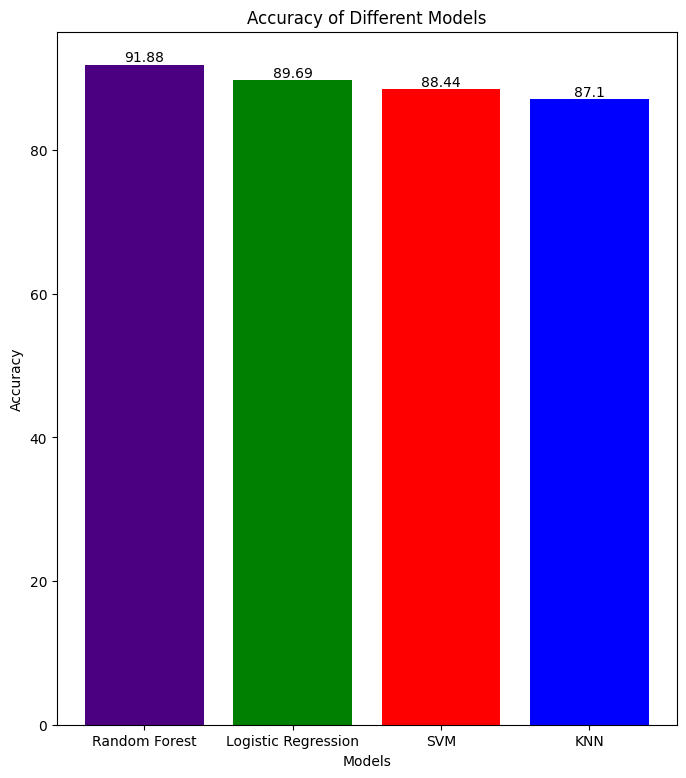

In [37]:
plt.figure(figsize=(8,9))
colors = ['indigo', 'green', 'red', 'blue']

# Use plt.bar() with the 'Models' column as x-axis and 'Accuracy' column as y-axis
bars = plt.bar(x=result['Models'], height=result['Accuracy'], color=colors)

# Add values on top of the bars
for bar, value in zip(bars, result['Accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, round(value, 2), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

From the above bar plot the Random Forest Model acheived the highest accuracy

#### Building a predicitve system using random forest model ####

In [38]:
input_data = (7.3,0.34,0.33,2.5,0.064,21.0,37.0,0.9952,3.35,0.77,12.1)

#changing the input data to a numpy array
c_input = np.asarray(input_data)
c_input

array([ 7.3   ,  0.34  ,  0.33  ,  2.5   ,  0.064 , 21.    , 37.    ,
        0.9952,  3.35  ,  0.77  , 12.1   ])

In [39]:
## reshaping the data
c_input_reshape = c_input.reshape(1,-1)

In [40]:
## prediction
predict_test = model_rf.predict(c_input_reshape)

if (predict_test[0] ==1):
    print('Good quality Wine')
else:
    print('Bad quality Wine')

Good quality Wine


c:\Users\Oluwuyi Olumide\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [145]:
excel_path = 'C:/Users/Oluwuyi Olumide/Downloads/Wine Quality/winequality.xlsx'

wine_data.to_excel(excel_path, index=False)

### Saving the model

In [41]:
import joblib

joblib.dump(model_rf, 'wine_quality_model.joblib')

['wine_quality_model.joblib']

## THE END